In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

hc_df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [2]:
hc_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
hc_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
hc_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

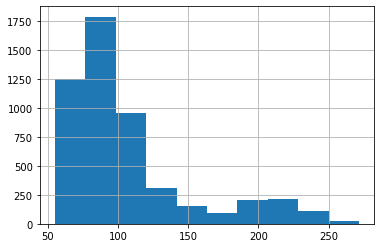

In [5]:
hc_df.avg_glucose_level.hist()

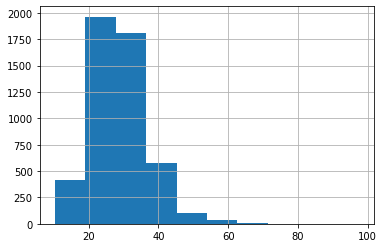

In [6]:
hc_df.bmi.hist()

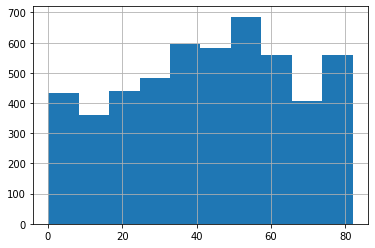

In [7]:
hc_df.age.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


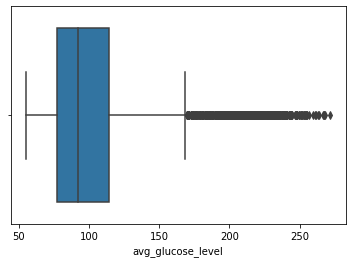

In [8]:
import seaborn as sns

sns.boxplot(hc_df.avg_glucose_level)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


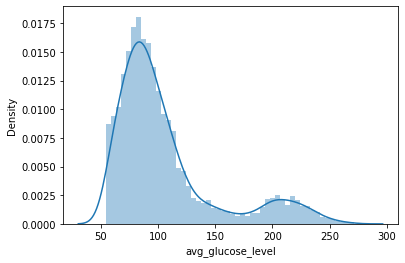

In [9]:
sns.distplot(hc_df.avg_glucose_level)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


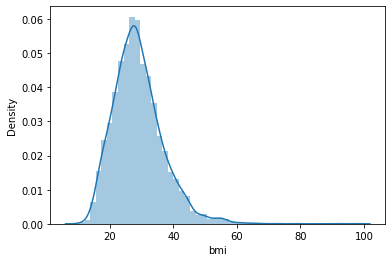

In [10]:
sns.distplot(hc_df.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


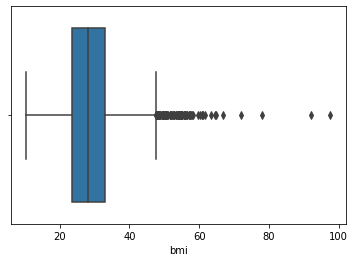

In [11]:
sns.boxplot(hc_df.bmi)

In [12]:
hc_df['bmi'] = hc_df['bmi'].fillna(hc_df['bmi'].mean())

In [13]:
hc_df['bmi'].isnull().sum()

0

In [14]:
hc_df['bmi'] = np.log(hc_df['bmi'])

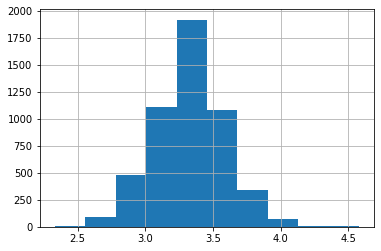

In [15]:
hc_df['bmi'].hist()

In [16]:
hc_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
hc_df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [18]:
hc_df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [19]:
hc_df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [20]:
hc_df['Residence_type'] = pd.get_dummies(hc_df.Residence_type, drop_first= True)

In [21]:
hc_df['ever_married'] = pd.get_dummies(hc_df.ever_married, drop_first=True)
hc_df['gender'] = pd.get_dummies(hc_df.gender, drop_first=True)

In [22]:
scale_mapper = {"never smoked":1, "Unknown":2, "formerly smoked":3, "smokes":4}
hc_df['smoking_status'] = hc_df["smoking_status"].replace(scale_mapper)

In [48]:
scale_mapper1 = {"Private":1, "Self-employed":2, "children":3, "Govt_job":4, "Never_worked": 5}
hc_df['work_type'] = hc_df["work_type"].replace(scale_mapper1)

In [49]:
hc_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,3.600048,3,1
1,51676,0,61.0,0,0,1,2,0,202.21,3.363608,1,1
2,31112,1,80.0,0,1,1,1,0,105.92,3.481240,1,1
3,60182,0,49.0,0,0,1,1,1,171.23,3.538057,4,1
4,1665,0,79.0,1,0,1,2,0,174.12,3.178054,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,1,83.75,3.363608,1,0
5106,44873,0,81.0,0,0,1,2,1,125.20,3.688879,1,0
5107,19723,0,35.0,0,0,1,2,0,82.99,3.421000,1,0
5108,37544,1,51.0,0,0,1,1,0,166.29,3.242592,3,0


In [55]:
y = hc_df['stroke'].values
X = hc_df.drop(['stroke', 'id'], axis= 1)
X = X.values

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=112
)

In [47]:
X_test

array([[0, 41.0, 0, ..., 98.85, 3.202746442938317, 1],
       [0, 45.0, 0, ..., 81.02, 3.6635616461296463, 1],
       [0, 29.0, 0, ..., 92.49, 3.100092288878234, 1],
       ...,
       [0, 56.0, 0, ..., 102.51, 4.019980146933238, 2],
       [1, 46.0, 0, ..., 102.27, 3.6609942506244004, 3],
       [1, 65.0, 0, ..., 172.86, 3.5380565643793527, 1]], dtype=object)

In [57]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train)

preds = xgb_cl.predict(X_test)

print("The accuracy score is:",
accuracy_score(y_test, preds))

The accuracy score is: 0.9507042253521126


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


matrix = confusion_matrix(y_test,preds, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[   0   62]
 [   1 1215]]


In [59]:
matrix = classification_report(y_test,preds,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        62
           0       0.95      1.00      0.97      1216

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



In [60]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [61]:
from sklearn.model_selection import GridSearchCV

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

_ = grid_cv.fit(X, y)

In [62]:
grid_cv.best_score_

0.8459725376093293